# <center><span style="font-size: 45px;">SALARY EDA & MODEL PREDICTION</span></center>



<img src="https://news.clearancejobs.com/wp-content/uploads/2017/04/Salary-Stacks-Up-818x300-720x300.png" alt="Image Description" width="700" height="300">


## 1. Explore & Understand the Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("/kaggle/input/salary-prediction-data/salary_prediction_data.csv")
df.shape

(1000, 7)

In [4]:
df.head(7)

,Education,Experience,Location,Job_Title,Age,Gender,Salary
0,High School,8,Urban,Manager,63,Male,84620.053665
1,PhD,11,Suburban,Director,59,Male,142591.255894
2,Bachelor,28,Suburban,Manager,61,Female,97800.255404
3,High School,29,Rural,Director,45,Male,96834.671282
4,PhD,25,Urban,Analyst,26,Female,132157.786175
5,PhD,19,Rural,Director,27,Female,156312.936208
6,PhD,4,Rural,Director,60,Female,130567.649455


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Education   1000 non-null   object 
 1   Experience  1000 non-null   int64  
 2   Location    1000 non-null   object 
 3   Job_Title   1000 non-null   object 
 4   Age         1000 non-null   int64  
 5   Gender      1000 non-null   object 
 6   Salary      1000 non-null   float64
dtypes: float64(1), int64(2), object(4)
memory usage: 54.8+ KB


In [6]:
df.isna().sum()

Education     0
Experience    0
Location      0
Job_Title     0
Age           0
Gender        0
Salary        0
dtype: int64

In [7]:
df.describe()

,Experience,Age,Salary
count,1000.000000,1000.000000,1000.000000
mean,14.771000,42.377000,105558.404239
std,8.341111,13.609412,28256.972075
min,1.000000,20.000000,33510.510669
25%,7.000000,30.000000,85032.141517
50%,15.000000,43.000000,104314.518315
75%,22.000000,55.000000,126804.047524
max,29.000000,64.000000,193016.602150


In [8]:
df.duplicated().sum()

0

In [9]:
df.columns

Index(['Education', 'Experience', 'Location', 'Job_Title', 'Age', 'Gender',
       'Salary'],
      dtype='object')

In [10]:
print(f"Education => {df['Education'].unique()}")

print(f"Location => {df['Location'].unique()}")

print(f"Job Title => {df['Job_Title'].unique()}")

print(f"Gender => {df['Gender'].unique()}")



Education => ['High School' 'PhD' 'Bachelor' 'Master']
Location => ['Urban' 'Suburban' 'Rural']
Job Title => ['Manager' 'Director' 'Analyst' 'Engineer']
Gender => ['Male' 'Female']


## 2. EDA

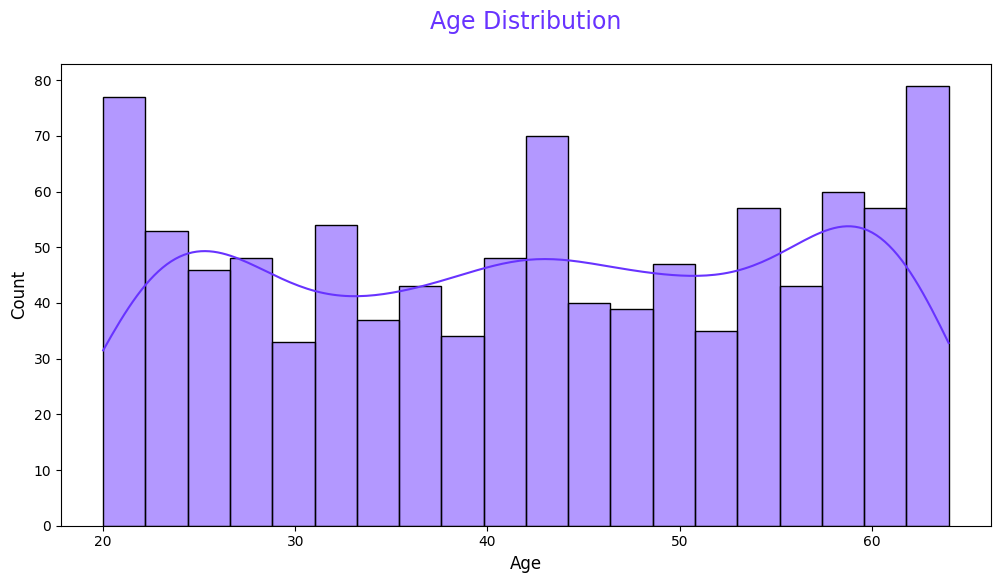

In [11]:
plt.figure(figsize=(12, 6))
sns.histplot(df["Age"], bins=20, kde=True, color='#6833ff')

plt.xlabel('Age', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Age Distribution', fontsize=17, pad = 25,color = '#6833ff')
plt.show()


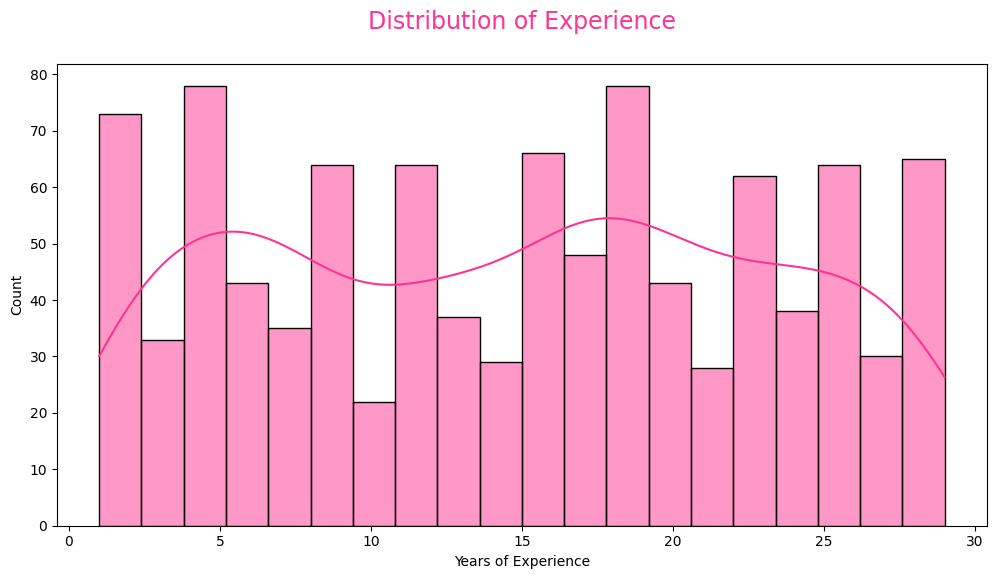

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.histplot(df['Experience'], bins=20, kde=True,color= '#ff3390')
plt.xlabel("Years of Experience")
plt.ylabel("Count")
plt.title("Distribution of Experience", pad = 25, color = '#ff3390',fontsize = 17)
plt.show()


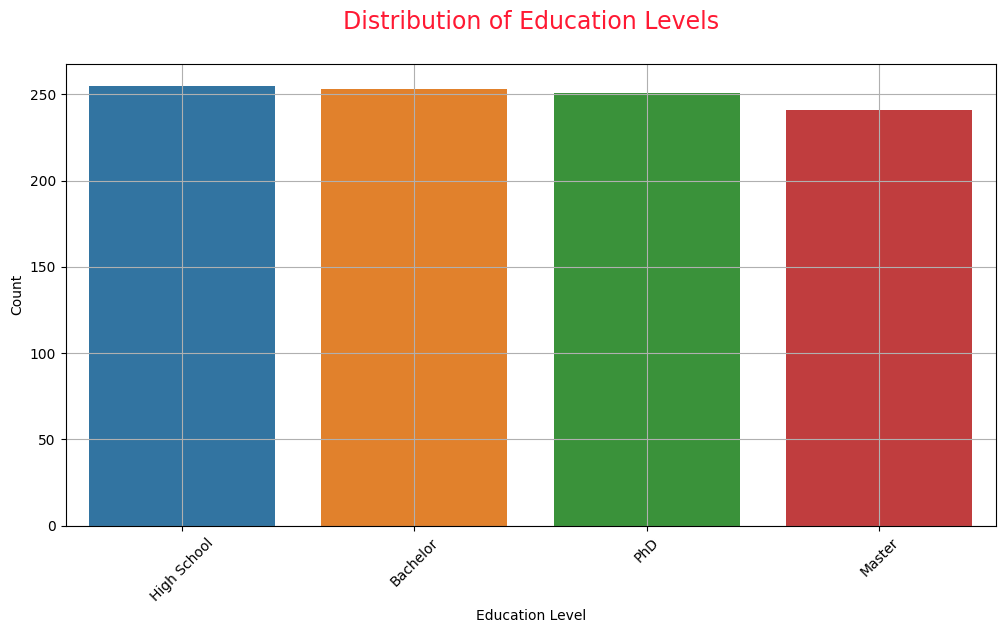

In [13]:
plt.figure(figsize=(12, 6))
sns.countplot(x=df['Education'], order=df['Education'].value_counts().index)
plt.xlabel("Education Level")
plt.xticks(rotation=45) 
plt.ylabel("Count")
plt.title("Distribution of Education Levels", pad = 25, fontsize = 17, color = '#ff1933')

plt.grid()
plt.show()


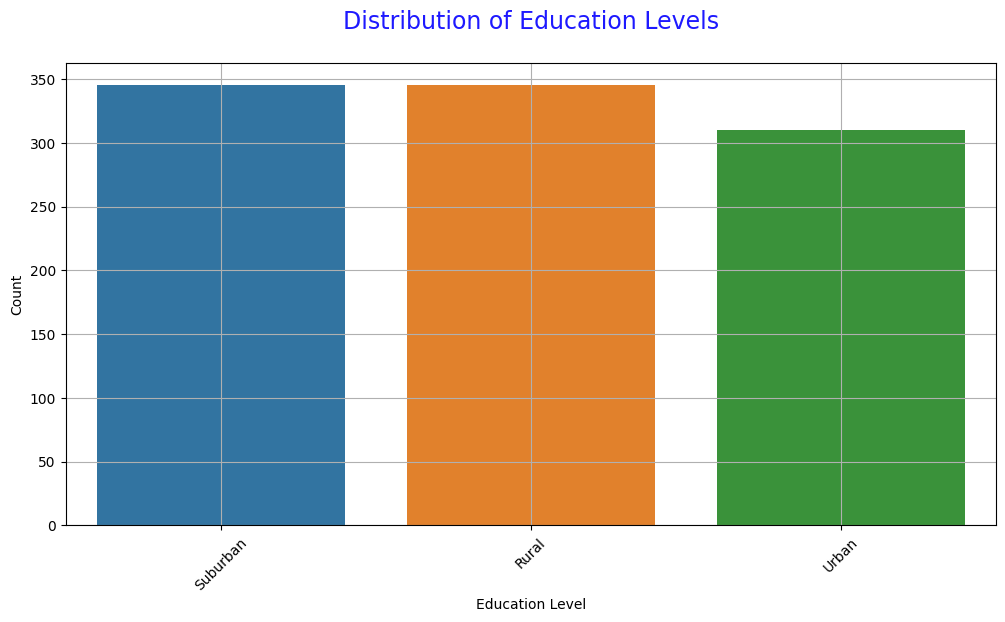

In [14]:
plt.figure(figsize=(12, 6))
sns.countplot(x=df['Location'], order=df['Location'].value_counts().index)
plt.xlabel("Education Level")
plt.xticks(rotation=45) 
plt.ylabel("Count")
plt.title("Distribution of Education Levels", pad = 25, fontsize = 17, color = '#1e19ff')

plt.grid()
plt.show()


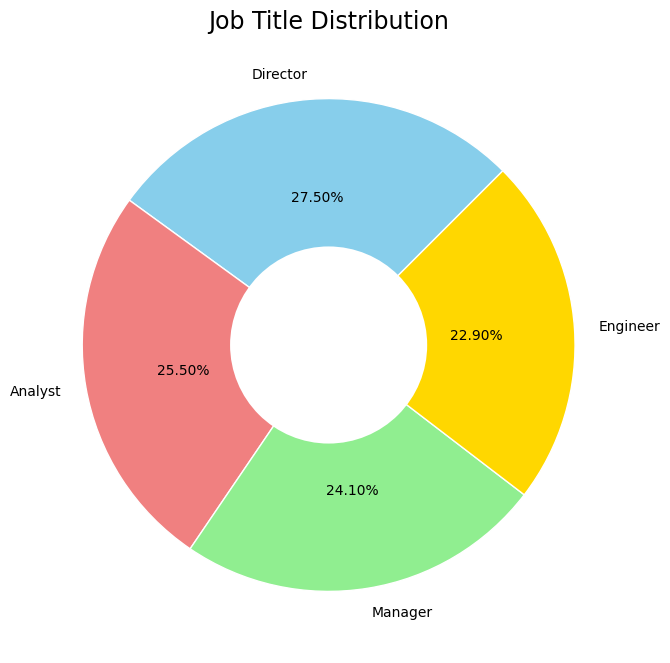

In [15]:
job_counts = df['Job_Title'].value_counts()

plt.figure(figsize=(12, 8))
plt.pie(job_counts, labels=job_counts.index, autopct='%1.2f%%', 
        colors=['skyblue', 'lightcoral', 'lightgreen', 'gold'], startangle=45, wedgeprops={'edgecolor': 'white'})

plt.gca().add_artist(plt.Circle((0,0), 0.4, fc='white'))

plt.title("Job Title Distribution", fontsize = 17)
plt.show()


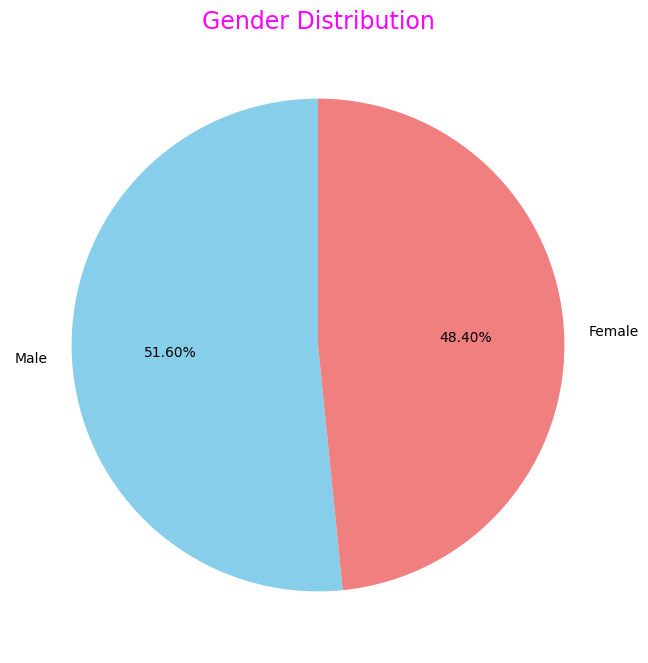

In [16]:
gender_counts = df['Gender'].value_counts()

plt.figure(figsize=(12, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.2f%%', colors=['skyblue', 'lightcoral'], startangle=90)
plt.title("Gender Distribution", fontsize = 17, color = '#ff00ff')
plt.show()


## 3. Feature Selection & Engineering

In [17]:
df['Gender'] = df['Gender'].replace({'Male': 0, 'Female': 1})

df['Education'] = df['Education'].map({'High School': 0, 'Bachelor': 1, 'Master': 2, 'PhD': 3})

In [18]:
encoder = OneHotEncoder(drop='first', sparse=False)

encoded_features = encoder.fit_transform(df[['Location', 'Job_Title']])
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(['Location', 'Job_Title']))

df = pd.concat([df.drop(columns=['Location', 'Job_Title']), encoded_df], axis=1)


In [19]:
print(df.head())

   Education  Experience  Age  Gender         Salary  Location_Suburban  \
0          0           8   63       0   84620.053665                0.0   
1          3          11   59       0  142591.255894                1.0   
2          1          28   61       1   97800.255404                1.0   
3          0          29   45       0   96834.671282                0.0   
4          3          25   26       1  132157.786175                0.0   

   Location_Urban  Job_Title_Director  Job_Title_Engineer  Job_Title_Manager  
0             1.0                 0.0                 0.0                1.0  
1             0.0                 1.0                 0.0                0.0  
2             0.0                 0.0                 0.0                1.0  
3             0.0                 1.0                 0.0                0.0  
4             1.0                 0.0                 0.0                0.0  


In [20]:
df.shape

(1000, 10)

## 4. Build & Train the Model

In [21]:
X = df.drop(columns=['Salary'])  
y = df['Salary']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

## 5. Model Evaluation

In [23]:
def regression_report(y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"📊 Regression Report:")
    print(f"\t🔹 Mean Squared Error (MSE): {mse:.2f}")
    print(f"\t🔹 Root Mean Squared Error (RMSE): {rmse:.2f}")
    print(f"\t🔹 Mean Absolute Error (MAE): {mae:.2f}")
    print(f"\t🔹 R² Score: {r2:.4f}")

regression_report(y_test, y_pred)


📊 Regression Report:
	🔹 Mean Squared Error (MSE): 106280001.24
	🔹 Root Mean Squared Error (RMSE): 10309.22
	🔹 Mean Absolute Error (MAE): 8132.51
	🔹 R² Score: 0.8698
